In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
from tqdm import tqdm
import spacy
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import log_loss
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC

In [3]:
clean_train_df = pd.read_csv("clean_train_df.csv")
clean_train_df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0
4,4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0


In [4]:
#ValueError: np.nan is an invalid document, expected byte or unicode string.
clean_train_df['question1'] = clean_train_df['question1'].apply(lambda x: str(x))
clean_train_df['question2'] = clean_train_df['question2'].apply(lambda x: str(x))

In [5]:
clean_train_df['questions'] = clean_train_df[["question1", "question2"]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
clean_train_df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,questions
0,0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...
1,1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,what is the story of kohinoor koh i noor dia...
2,2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,how can i increase the speed of my internet co...
3,3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,why am i mentally very lonely how can i solve...
4,4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,which one dissolve in water quikly sugar salt...


In [6]:
questions = clean_train_df["questions"]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# merge texts
tfidf = TfidfVectorizer(lowercase=False,max_df=0.8, min_df=0.001 )
questions_text = tfidf.fit_transform(questions)


In [12]:
y_true = clean_train_df["is_duplicate"]

In [16]:
X_train,X_test, y_train, y_test = train_test_split(questions_text, y_true, stratify=y_true, test_size=0.3)

In [11]:
n=np.arange(-3,3)
r=pow(float(10),n)


array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [26]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    
    

In [25]:
best_alpha = np.argmin(log_error_array)
best_alpha

4

For values of alpha =  0.001 The log loss is: 0.5758261250994137
For values of alpha =  0.01 The log loss is: 0.5508666252004589
For values of alpha =  0.1 The log loss is: 0.5273658994513273
For values of alpha =  1.0 The log loss is: 0.5181373861786559
For values of alpha =  10.0 The log loss is: 0.5176798500180448
For values of alpha =  100.0 The log loss is: 0.5176853149520726


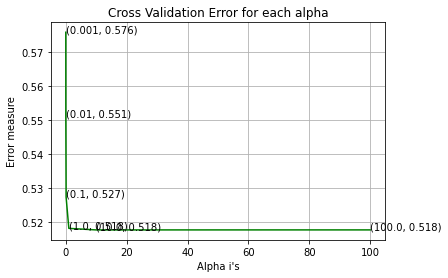

For values of alpha =  100.0 The log loss is: 0.5176853149520726
For values of best alpha =  4 The train log loss is: 0.5134534622685276
For values of best alpha =  4 The test log loss is: 0.5176494512781249
Total number of data points : 121287


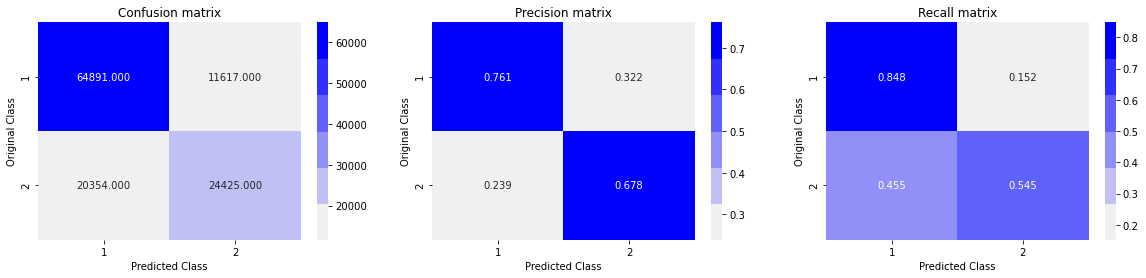

In [30]:
log_error_array = []
for alpha in r:
    logistic_model = LogisticRegression(C=alpha, random_state=45)
    logistic_model.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(logistic_model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=logistic_model.classes_, eps=1e-15))
    print('For values of alpha = ', alpha, "The log loss is:",log_loss(y_test, predict_y, labels=logistic_model.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(r, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((r[i],np.round(txt,3)), (r[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)

logistic_model = LogisticRegression(C=best_alpha, random_state=45)
logistic_model.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(logistic_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

print('For values of alpha = ', alpha, "The log loss is:",log_loss(y_test, predict_y, labels=logistic_model.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train, predict_y, labels=logistic_model.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test, predict_y, labels=logistic_model.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


For values of alpha =  0.001 The log loss is: 0.576427138828665
For values of alpha =  0.01 The log loss is: 0.5576796097605496
For values of alpha =  0.1 The log loss is: 0.5336363494526937
For values of alpha =  1.0 The log loss is: 0.5245953864992227
For values of alpha =  10.0 The log loss is: 0.5232905703756738
For values of alpha =  100.0 The log loss is: 0.5234892979768269


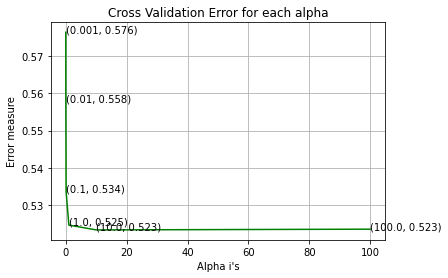

For values of alpha =  100.0 The log loss is: 0.5234892979768269
For values of best alpha =  4 The train log loss is: 0.5199396498619653
For values of best alpha =  4 The test log loss is: 0.5235216484227043
Total number of data points : 121287


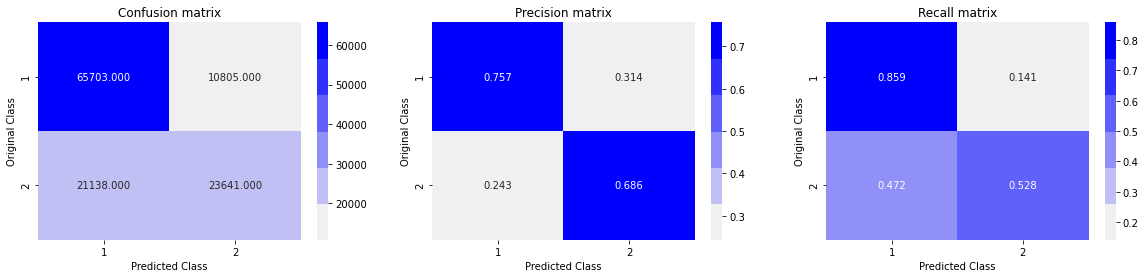

In [33]:
log_error_array = []
for alpha in r:
    linear_model = LinearSVC(C=alpha, random_state=45,loss='hinge')
    linear_model.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(linear_model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=linear_model.classes_, eps=1e-15))
    print('For values of alpha = ', alpha, "The log loss is:",log_loss(y_test, predict_y, labels=linear_model.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(r, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((r[i],np.round(txt,3)), (r[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)

linear_model = LinearSVC(C=best_alpha, random_state=45,loss='hinge')
linear_model.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(linear_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

print('For values of alpha = ', alpha, "The log loss is:",log_loss(y_test, predict_y, labels=linear_model.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', best_alpha, "The train log loss is:",log_loss(y_train, predict_y, labels=linear_model.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', best_alpha, "The test log loss is:",log_loss(y_test, predict_y, labels=linear_model.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
